<a href="https://colab.research.google.com/github/manendranathshukla/IoT_Project_With_Data_Analytics/blob/master/AnalysedData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iot Project Machine Learning Implementation


In [0]:
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("data.csv")
mydata=pd.DataFrame(data)


In [117]:
mydata.head()

,Time,Temperature,Salinity,Oxygen,pH,Unnamed: 5
0,2045,13.233,33.5317,209.86,7.999,NaN
1,2100,13.300,33.4850,209.84,8.001,NaN
2,2114,13.269,33.4960,208.82,7.998,NaN
3,2129,13.261,33.4764,207.71,7.995,NaN
4,2145,13.284,33.4921,207.39,7.999,NaN


In [0]:
mydata=mydata.drop(['Unnamed: 5'],axis=1)

In [0]:
mydata=mydata.drop(['Time'],axis=1)

In [120]:
mydata


,Temperature,Salinity,Oxygen,pH
0,13.233,33.5317,209.86,7.999
1,13.300,33.4850,209.84,8.001
2,13.269,33.4960,208.82,7.998
3,13.261,33.4764,207.71,7.995
4,13.284,33.4921,207.39,7.999
...,...,...,...,...
1054,13.677,33.4755,264.44,8.097
1055,13.794,33.5313,264.72,8.096
1056,13.937,33.5421,265.83,8.093
1057,13.772,33.5160,267.24,8.101


In [0]:
Y=mydata['pH']
x=mydata.drop('pH',axis=1)

In [122]:
x.head()

,Temperature,Salinity,Oxygen
0,13.233,33.5317,209.86
1,13.300,33.4850,209.84
2,13.269,33.4960,208.82
3,13.261,33.4764,207.71
4,13.284,33.4921,207.39


In [123]:
Y.head()

0    7.999
1    8.001
2    7.998
3    7.995
4    7.999
Name: pH, dtype: float64

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.33,random_state=5)

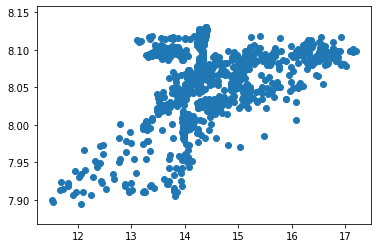

In [126]:
phdata=mydata['pH']
temp=mydata['Temperature']
#plt.plot(temp, phdata, 'b-', label='ph Value')
#plt.plot(years, temp, 'g-', label='Temperature Value')
plt.scatter(temp, phdata)



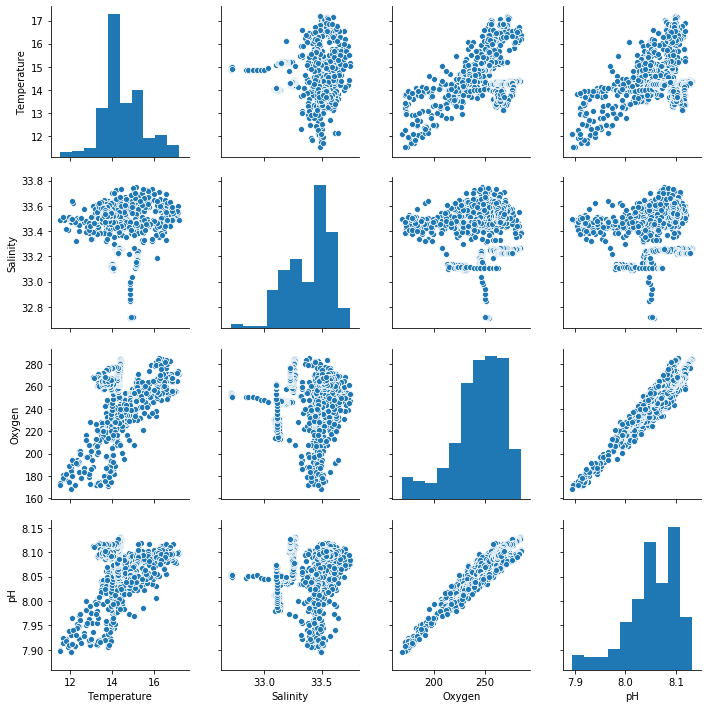

In [127]:
import seaborn as sns
sns.pairplot(mydata)

In [128]:


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(709, 3)
(350, 3)
(709,)
(350,)


In [129]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
print(lm.intercept_)
print(lm.coef_)

7.699444718716138
[0.02435269]


In [0]:


ph_pred=lm.predict(x_test)



In [131]:
df=pd.DataFrame(ph_pred,y_test)
print(df)

              0
pH             
8.040  8.043115
8.052  8.057071
8.100  8.103477
8.040  8.048239
8.097  8.104991
...         ...
8.008  8.004403
8.031  8.041335
8.095  8.083642
8.037  8.024524
8.085  8.082646

[350 rows x 1 columns]


In [132]:
print(lm.predict([[26,33,208]]))

[7.94763982]


In [133]:
from sklearn.metrics import mean_squared_error,accuracy_score
mse=mean_squared_error(y_test,ph_pred)
#acc=accuracy_score(y_test,ph_pred)
print(mse)
#print(acc)

0.00017626605671236745


In [134]:
from sklearn.metrics import r2_score

print(r2_score(y_test,ph_pred))

0.9331216961456694


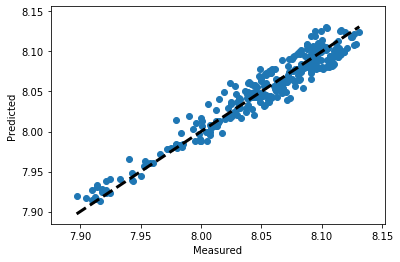

In [135]:
fig,ax=plt.subplots()
ax.scatter(y_test,ph_pred)
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=3)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

Predicting pH Only With Temperature Value


In [0]:
xx=mydata['Temperature']


In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(xx,Y,test_size=0.3,random_state=5)

In [138]:
print(X_test.shape)
#X_train.reshape(1,-1)

(318,)


In [139]:
lm.fit(mydata[['Temperature']],Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
lm.predict([[35]])

array([8.55178892])

Decision Tree Regression 

In [0]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=1)

In [142]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [0]:
pred=dtr.predict(x_test)


In [144]:
dd=pd.DataFrame(pred)
dd

,0
0,8.044
1,8.048
2,8.093
3,8.044
4,8.105
...,...
345,8.012
346,8.054
347,8.091
348,8.028


In [145]:
from sklearn.metrics import r2_score

print(r2_score(y_test,dd))

0.9588007553485483


In [146]:
y_test

423    8.040
580    8.052
246    8.100
445    8.040
234    8.097
       ...  
533    8.008
823    8.031
129    8.095
366    8.037
213    8.085
Name: pH, Length: 350, dtype: float64

Support Vector Machine Regression 

In [0]:
from sklearn import svm

svmmodel=svm.SVR()


In [148]:
svmmodel.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
svmpred=svmmodel.predict(x_test)

In [150]:
svmpred

array([8.01556919, 8.0155692 , 8.0161572 , 8.01556919, 8.01719727,
       8.01556919, 8.01573045, 8.01556919, 8.01556919, 8.01692839,
       8.01559706, 8.01637147, 8.00841293, 8.01561747, 8.02685738,
       8.01556919, 8.01938237, 8.01606343, 8.01556919, 8.01556919,
       8.0155692 , 8.01566349, 8.01556919, 8.01556919, 8.02719773,
       8.01556919, 8.01556919, 8.01556919, 8.01556919, 8.01578282,
       8.01556919, 8.01556919, 8.0171176 , 8.01568175, 8.01556919,
       8.01556919, 8.01556919, 8.01556919, 8.01562446, 8.01556919,
       8.01556919, 8.01596844, 8.01556919, 8.01617919, 8.01563129,
       8.02644746, 8.01556919, 8.01579912, 8.01556919, 8.00098336,
       8.0160842 , 8.01556919, 8.01556919, 8.01578024, 8.01556919,
       8.01556919, 8.01556919, 8.01556919, 8.01556919, 8.01831349,
       8.01557747, 8.01556919, 8.01612248, 8.01606018, 8.0123966 ,
       8.01556919, 8.01214343, 8.01567729, 8.02606047, 8.01556919,
       8.01601689, 8.01556919, 8.01556919, 8.01653819, 8.01556

In [156]:
#from sklearn.metrics import r2_score


print("Using Support Vector Regressor")
print("Mean Squared Error : %f"%(sklearn.metrics.mean_squared_error(y_test,svmpred)))
print("Mean Absolute Error : %f"%(sklearn.metrics.mean_absolute_error(y_test,svmpred)))
print("R2 Score : %f"%(sklearn.metrics.r2_score(y_test,svmpred)))

Using Support Vector Regressor
Mean Squared Error : 0.003774
Mean Absolute Error : 0.053770
R2 Score : -0.432073


Gredient Boosting Regression 

In [0]:
from sklearn.utils import shuffle
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [0]:
clf = ensemble.GradientBoostingRegressor(**params)


In [168]:
clf.fit(x_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [169]:
print("Accuracy : %f"%(r2_score(y_test,clf.predict(x_test))))
gbr=clf.predict(x_test)

Accuracy : 0.972219


MSE: 0.0001


Text(0, 0.5, 'Deviance')

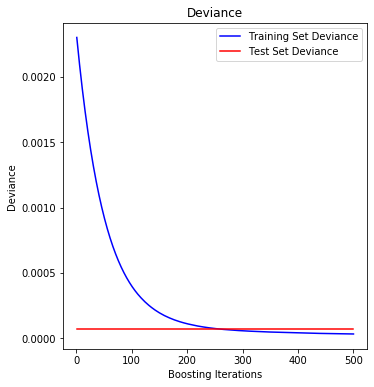

In [170]:
mse = mean_squared_error(y_test, clf.predict(x_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(x_test)):
    test_score[i] = clf.loss_(y_test, gbr)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [174]:
data.columns

Index(['Time', 'Temperature', 'Salinity', 'Oxygen', 'pH', 'Unnamed: 5'], dtype='object')